#### Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline

 #Adjusts the configuration of the plots that we create
    
matplotlib.rcParams['figure.figsize'] = (12,8) 

#### Reading the Dataset

In [2]:
df = pd.read_csv(r'C:\Users\Jhanvi.Kasundra\OneDrive - State of Kansas, OITS\Desktop\UPSKILLING\Untitled Folder\movies.csv')

#### Looking at the data 

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


#### Cleaning the data

In [4]:
##### checking if there is any missing data

In [5]:
for col in df.columns:
    percent_missing=np.mean(df[col].isnull())
    print('{} - {}%'.format(col,percent_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


#### Looking at the data types

In [6]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

#### Changing data types of the columns

In [7]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype(int)
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype(int) 

C:\Users\Jhanvi.Kasundra\AppData\Local\anaconda3\Lib\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)


In [60]:
df.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Location,yearupdated
6663,5144,5,0,2015,612,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,56,35
7244,536,5,0,2018,161,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,56,38
7480,6194,4,2,2019,1307,6.9,222000.0,1455,1919,676,55,260000000,1670727580,2316,118.0,56,39
6653,2969,5,0,2015,1509,7.0,593000.0,517,3568,437,55,150000000,1670516444,2281,124.0,56,35
6043,5502,5,0,2012,2170,8.0,1300000.0,1517,2314,2241,55,220000000,1518815515,1606,143.0,56,32


In [9]:
df[['released', 'Location']] = df['released'].str.split('(', expand=True)

In [61]:
df.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Location,yearupdated
6663,5144,5,0,2015,612,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,56,35
7244,536,5,0,2018,161,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,56,38
7480,6194,4,2,2019,1307,6.9,222000.0,1455,1919,676,55,260000000,1670727580,2316,118.0,56,39
6653,2969,5,0,2015,1509,7.0,593000.0,517,3568,437,55,150000000,1670516444,2281,124.0,56,35
6043,5502,5,0,2012,2170,8.0,1300000.0,1517,2314,2241,55,220000000,1518815515,1606,143.0,56,32


In [11]:
df['yearupdated']=df['released'].astype(str).str[-5:]

In [62]:
df.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Location,yearupdated
6663,5144,5,0,2015,612,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,56,35
7244,536,5,0,2018,161,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,56,38
7480,6194,4,2,2019,1307,6.9,222000.0,1455,1919,676,55,260000000,1670727580,2316,118.0,56,39
6653,2969,5,0,2015,1509,7.0,593000.0,517,3568,437,55,150000000,1670516444,2281,124.0,56,35
6043,5502,5,0,2012,2170,8.0,1300000.0,1517,2314,2241,55,220000000,1518815515,1606,143.0,56,32


In [24]:
df = df.sort_values(by=['gross'],inplace=False,ascending=False)

In [14]:
pd.set_option('display.max_rows',None)

#### Drop any duplicates

In [17]:
df['company'].drop_duplicates().sort_values(ascending=False)
#df.drop_duplicates()

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3368                              Zentropa Entertainments
535                                  Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

In [63]:
df.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Location,yearupdated
6663,5144,5,0,2015,612,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,56,35
7244,536,5,0,2018,161,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,56,38
7480,6194,4,2,2019,1307,6.9,222000.0,1455,1919,676,55,260000000,1670727580,2316,118.0,56,39
6653,2969,5,0,2015,1509,7.0,593000.0,517,3568,437,55,150000000,1670516444,2281,124.0,56,35
6043,5502,5,0,2012,2170,8.0,1300000.0,1517,2314,2241,55,220000000,1518815515,1606,143.0,56,32


In [19]:
### Budget is going to have highest correlation 
### Company will have a high relation 

### Comparing the budget to gross revenue using a scatter plot

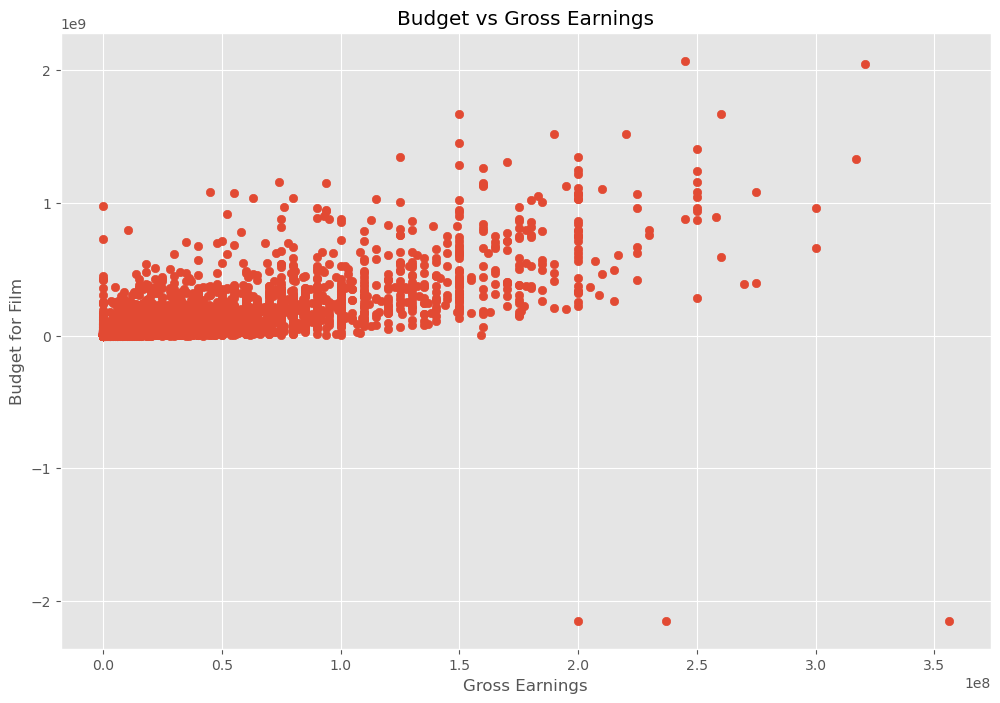

In [31]:
plt.scatter(x = df['budget'], y = df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

#### plot the budget vs gross using Seaborn

<Axes: xlabel='budget', ylabel='gross'>

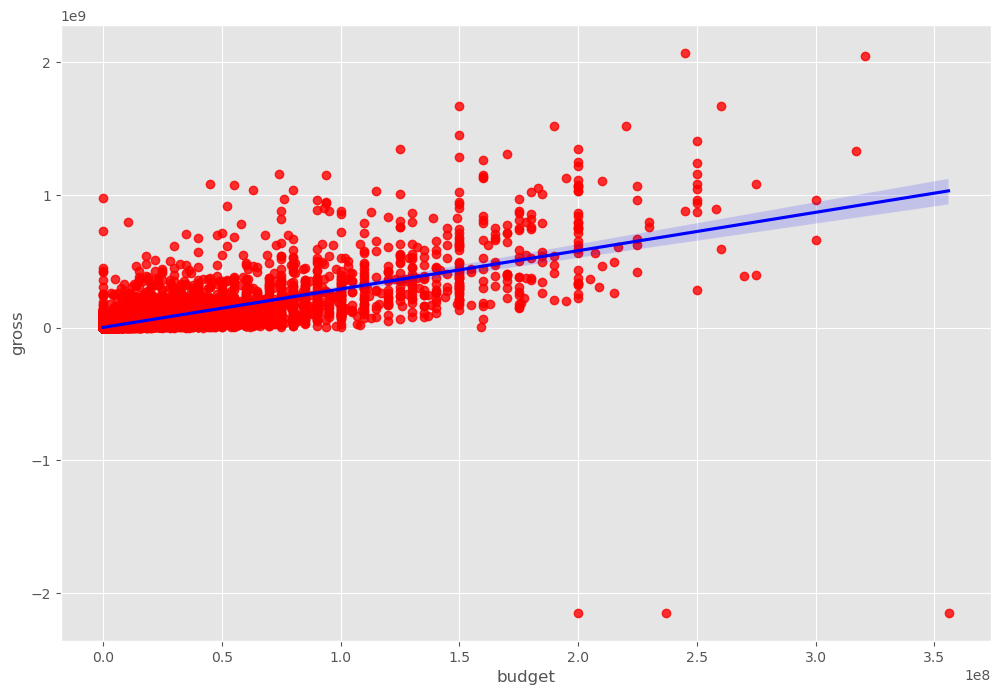

In [30]:
sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws = {"color":"red"}, line_kws={"color":"blue"})

#### Lets start looking at correlation

In [34]:
df.corr(method = 'pearson') #pearson, kendall, sprearman

C:\Users\Jhanvi.Kasundra\AppData\Local\Temp\ipykernel_20780\2793902044.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method = 'pearson') #pearson, kendall, sprearman


,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.256331,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.169406,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.573889,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.687124,0.269510
gross,0.256331,0.169406,0.573889,0.687124,1.000000,0.204177
runtime,0.120811,0.399451,0.309212,0.269510,0.204177,1.000000


In [35]:
df.corr(method = 'kendall') #pearson, kendall, sprearman

C:\Users\Jhanvi.Kasundra\AppData\Local\Temp\ipykernel_20780\3523866011.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method = 'kendall') #pearson, kendall, sprearman


,year,score,votes,budget,gross,runtime
year,1.000000,0.067652,0.331465,0.209304,0.215943,0.097184
score,0.067652,1.000000,0.300115,-0.005194,0.089155,0.283611
votes,0.331465,0.300115,1.000000,0.439902,0.558565,0.198240
budget,0.209304,-0.005194,0.439902,1.000000,0.540326,0.176016
gross,0.215943,0.089155,0.558565,0.540326,1.000000,0.175355
runtime,0.097184,0.283611,0.198240,0.176016,0.175355,1.000000


In [36]:
df.corr(method = 'spearman') #pearson, kendall, sprearman

C:\Users\Jhanvi.Kasundra\AppData\Local\Temp\ipykernel_20780\2292798264.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method = 'spearman') #pearson, kendall, sprearman


,year,score,votes,budget,gross,runtime
year,1.000000,0.099045,0.469829,0.291152,0.313716,0.142977
score,0.099045,1.000000,0.428138,-0.007500,0.130397,0.399857
votes,0.469829,0.428138,1.000000,0.604627,0.749942,0.290159
budget,0.291152,-0.007500,0.604627,1.000000,0.714457,0.246748
gross,0.313716,0.130397,0.749942,0.714457,1.000000,0.254471
runtime,0.142977,0.399857,0.290159,0.246748,0.254471,1.000000


High correlation between budget and gross

#### Correlation matrix

C:\Users\Jhanvi.Kasundra\AppData\Local\Temp\ipykernel_20780\869516287.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')


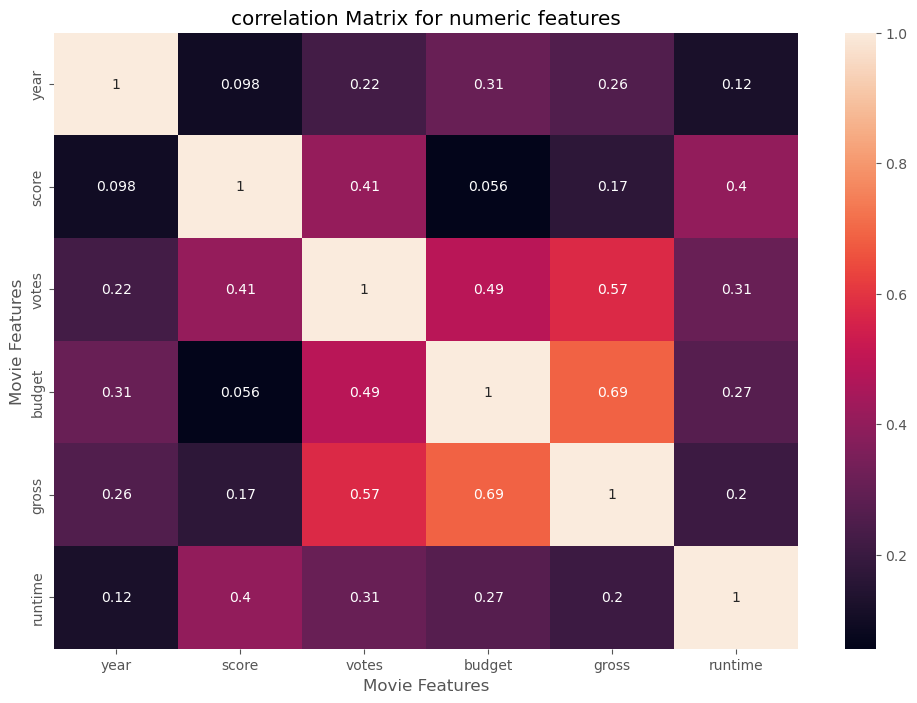

In [39]:
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('correlation Matrix for numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [40]:
#### Lokking at Company 

In [ ]:
df.head(5)

#### To convert company column to numeric so we can add it to correlation matrix

In [64]:
df_numerize = df

for col in df_numerize.columns:
    if(df_numerize[col].dtype == 'object'):
            df_numerize[col] = df_numerize[col].astype('category')
            df_numerize[col] = df_numerize[col].cat.codes
             
df_numerize.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Location,yearupdated
6663,5144,5,0,2015,612,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,56,35
7244,536,5,0,2018,161,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,56,38
7480,6194,4,2,2019,1307,6.9,222000.0,1455,1919,676,55,260000000,1670727580,2316,118.0,56,39
6653,2969,5,0,2015,1509,7.0,593000.0,517,3568,437,55,150000000,1670516444,2281,124.0,56,35
6043,5502,5,0,2012,2170,8.0,1300000.0,1517,2314,2241,55,220000000,1518815515,1606,143.0,56,32


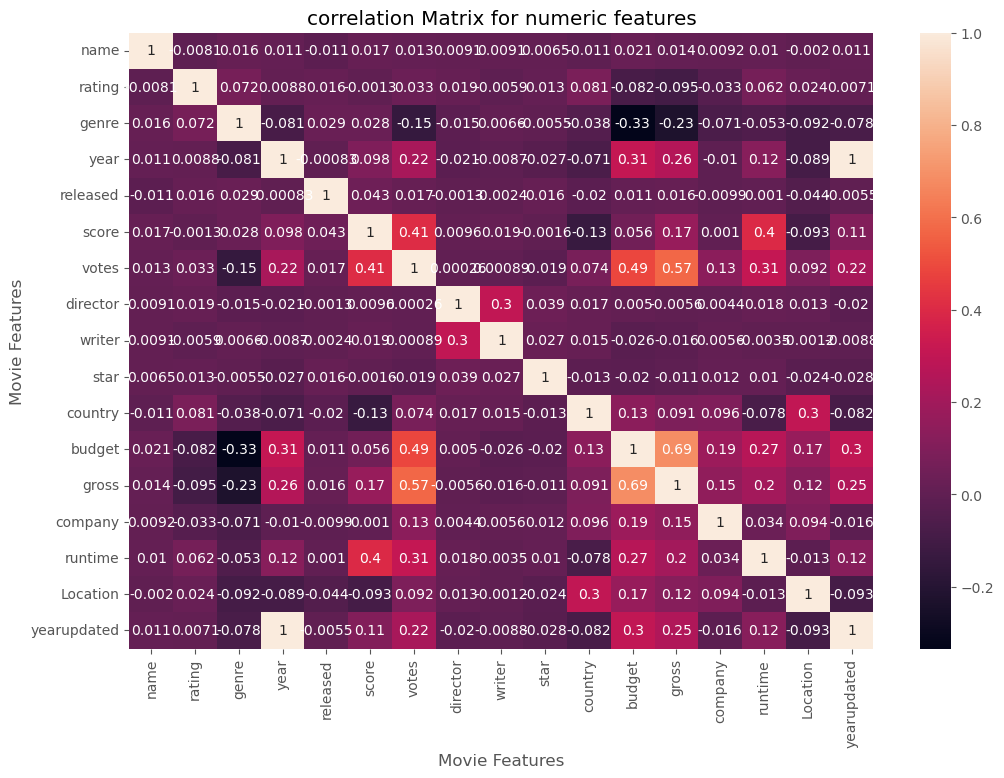

In [47]:
correlation_matrix = df_numerize.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('correlation Matrix for numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [48]:
df_numerize.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Location,yearupdated
name,1.000000,-0.008069,0.016355,0.011453,-0.011223,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.020548,0.013895,0.009211,0.010392,-0.001968,0.011134
rating,-0.008069,1.000000,0.072423,0.008779,0.015735,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095355,-0.032943,0.062145,0.023977,0.007054
genre,0.016355,0.072423,1.000000,-0.081261,0.029039,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.229534,-0.071067,-0.052711,-0.091572,-0.077550
year,0.011453,0.008779,-0.081261,1.000000,-0.000832,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.256331,-0.010431,0.120811,-0.089289,0.997295
released,-0.011223,0.015735,0.029039,-0.000832,1.000000,0.042918,0.017111,-0.001275,-0.002421,0.015597,-0.020063,0.010643,0.015758,-0.009933,0.000997,-0.043758,-0.005538
score,0.017097,-0.001314,0.027965,0.097995,0.042918,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.055665,0.169406,0.001030,0.399451,-0.092763,0.105601
votes,0.013088,0.033225,-0.145307,0.222945,0.017111,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.486862,0.573889,0.133204,0.309212,0.092014,0.218364
director,0.009079,0.019483,-0.015258,-0.020795,-0.001275,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,0.004976,-0.005615,0.004404,0.017624,0.013331,-0.020439
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002421,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.015602,0.005646,-0.003511,-0.001201,-0.008807
star,0.006472,0.013405,-0.005477,-0.027242,0.015597,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.010628,0.012442,0.010174,-0.023540,-0.027576


In [49]:
#### Using unstacking to order the above correlations

In [53]:
corr_mat = df_numerize.corr()
corr_pairs = corr_mat.unstack()
corr_pairs

name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.011453
             released      -0.011223
             score          0.017097
             votes          0.013088
             director       0.009079
             writer         0.009081
             star           0.006472
             country       -0.010737
             budget         0.020548
             gross          0.013895
             company        0.009211
             runtime        0.010392
             Location      -0.001968
             yearupdated    0.011134
rating       name          -0.008069
             rating         1.000000
             genre          0.072423
             year           0.008779
             released       0.015735
             score         -0.001314
             votes          0.033225
             director       0.019483
             writer        -0.005921
             star           0.013405
 

In [52]:
sort_pairs=corr_pairs.sort_values()
sort_pairs

genre        budget        -0.334021
budget       genre         -0.334021
genre        gross         -0.229534
gross        genre         -0.229534
genre        votes         -0.145307
votes        genre         -0.145307
country      score         -0.133348
score        country       -0.133348
rating       gross         -0.095355
gross        rating        -0.095355
yearupdated  Location      -0.093351
Location     yearupdated   -0.093351
score        Location      -0.092763
Location     score         -0.092763
genre        Location      -0.091572
Location     genre         -0.091572
             year          -0.089289
year         Location      -0.089289
country      yearupdated   -0.082274
yearupdated  country       -0.082274
budget       rating        -0.081939
rating       budget        -0.081939
genre        year          -0.081261
year         genre         -0.081261
country      runtime       -0.078412
runtime      country       -0.078412
genre        yearupdated   -0.077550
y

In [59]:
high_corr = sort_pairs[(sort_pairs) > 0.5]
high_corr

gross        votes          0.573889
votes        gross          0.573889
gross        budget         0.687124
budget       gross          0.687124
year         yearupdated    0.997295
yearupdated  year           0.997295
name         name           1.000000
writer       writer         1.000000
runtime      runtime        1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
Location     Location       1.000000
yearupdated  yearupdated    1.000000
dtype: float64

#### Votes and budget have the highest correlation to the gross earnings 
Company has low correlation